In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("neo.csv")  # Make sure neo.csv is in same folder
df.head()


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df_numeric = df.drop(columns=['id'])


In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

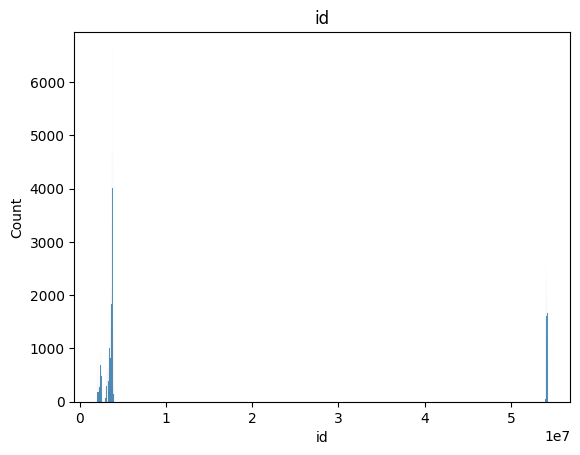

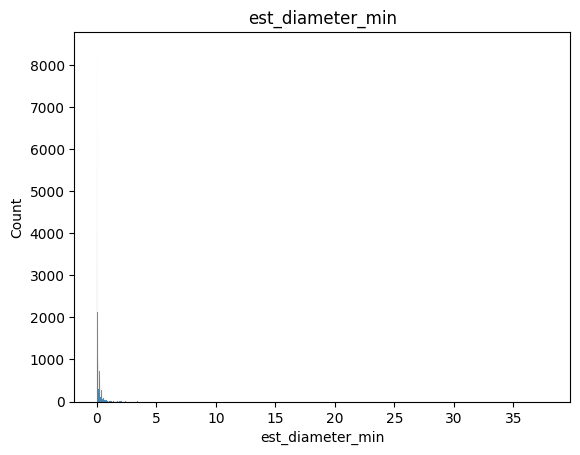

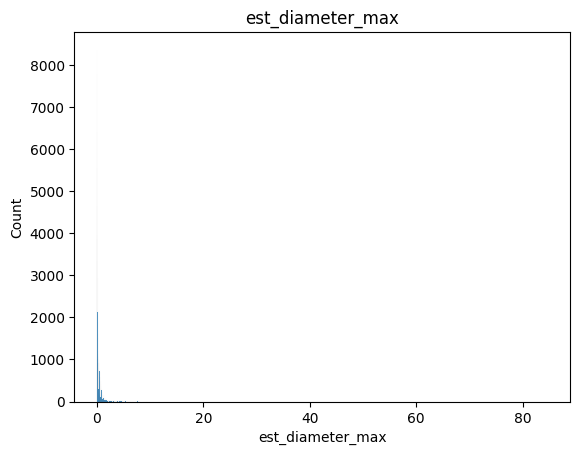

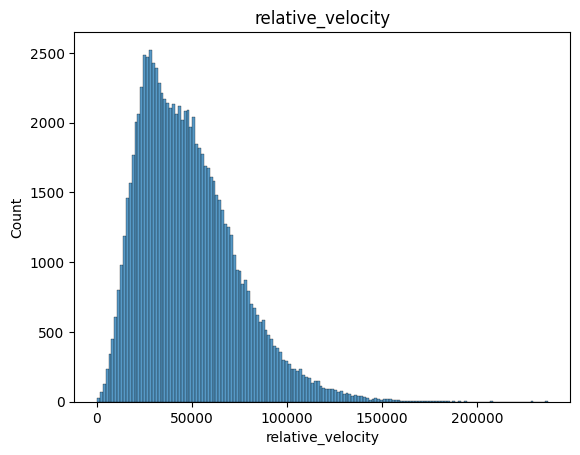

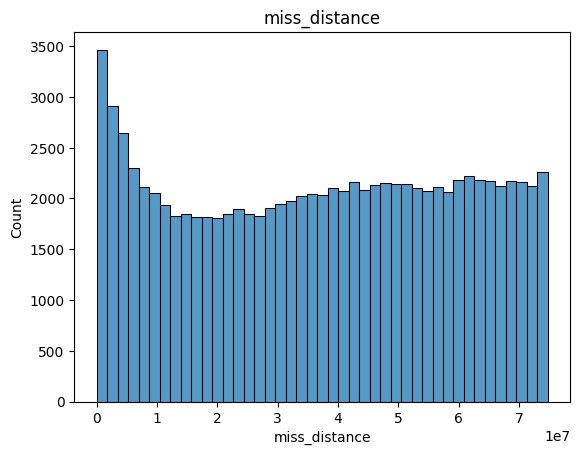

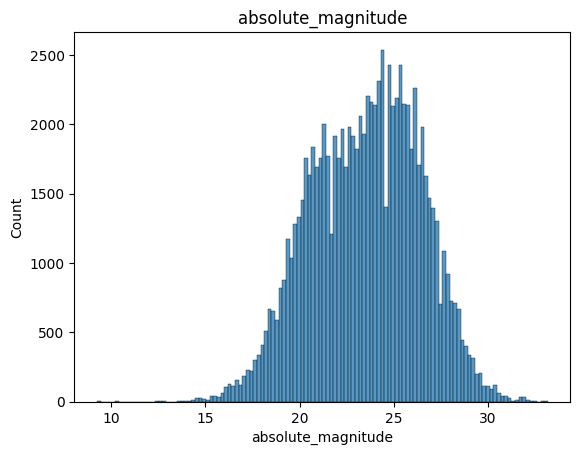

In [5]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

In [6]:

skew_info = df[num_cols].skew()
print(skew_info)


id                     1.378459
est_diameter_min      41.139952
est_diameter_max      41.139952
relative_velocity      0.905125
miss_distance         -0.042706
absolute_magnitude    -0.137420
dtype: float64


In [7]:
df_numeric = df.drop(columns=['id'])

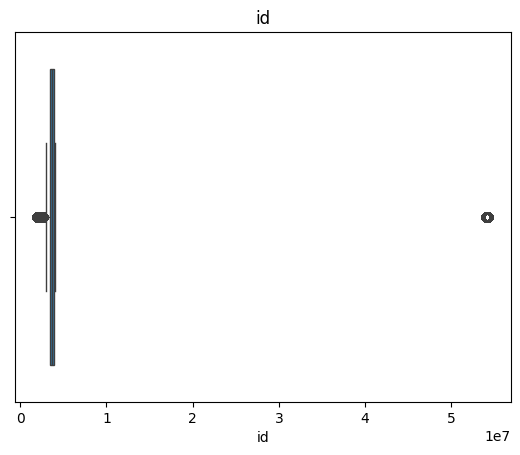

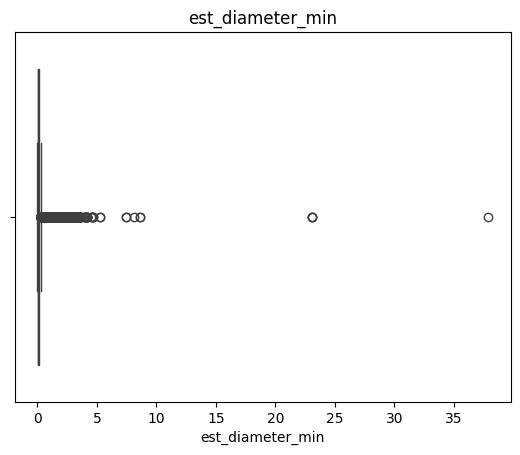

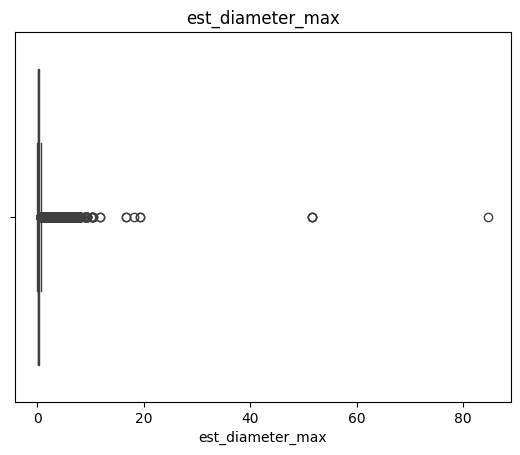

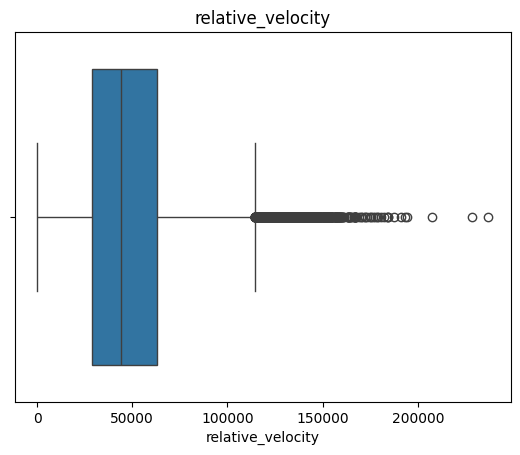

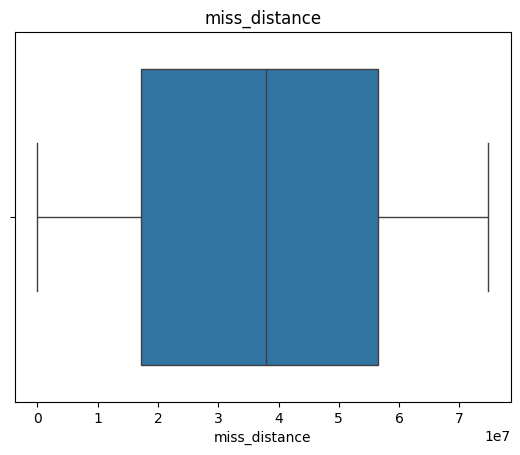

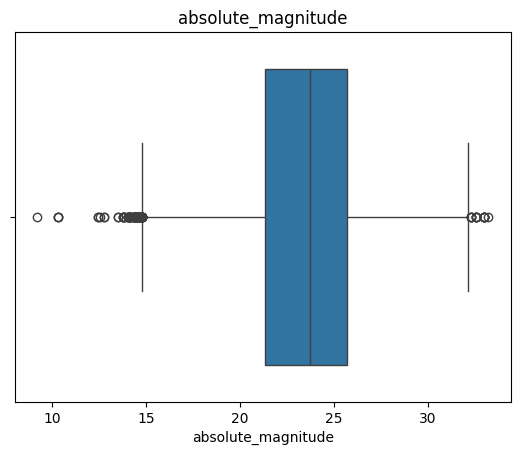

In [8]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [13]:
def cap_outliers_iqr(df):
    df = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)

    return df

df_clean = cap_outliers_iqr(df_numeric)


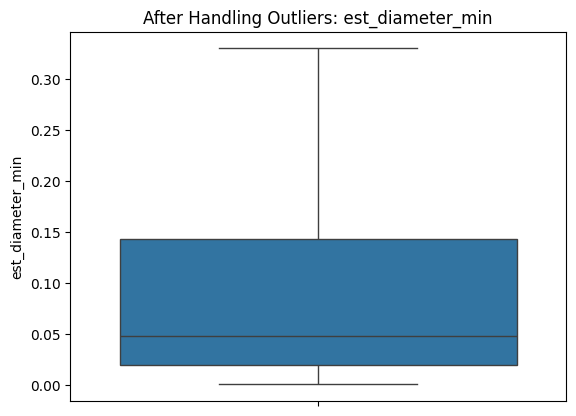

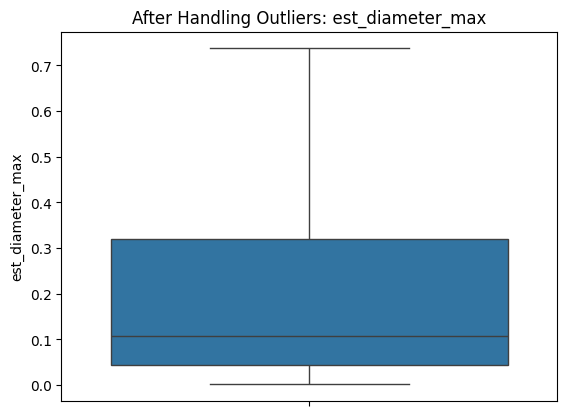

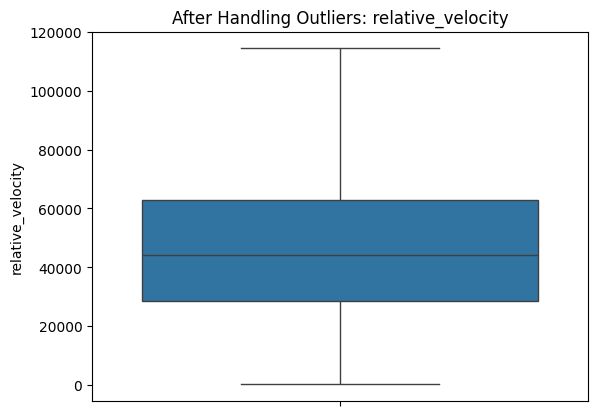

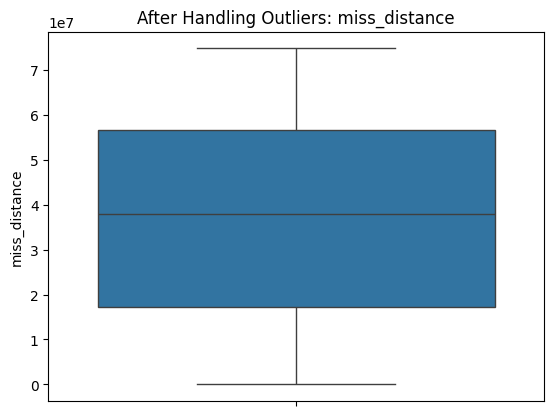

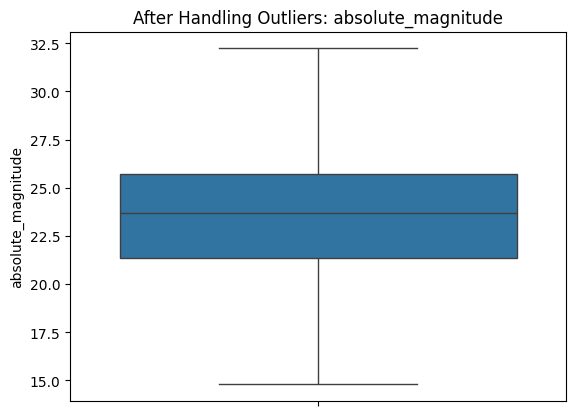

In [ ]:
numeric_cols = df_clean.select_dtypes(include='number').columns

for col in numeric_cols:
    sns.boxplot(y=df_clean[col])
    plt.title(f'After Handling Outliers: {col}')
    plt.show()